In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('haberman.csv')

<center> Looking at the basic structure of data</center>
<ul>
    <li>Features</li>
<li>Output label</li>
<li>Types of classes and number of classes</li>
<li>Number of samples</li>
<li>Number of samples belonging to each class</li>
</ul>

In [3]:
data.head(3)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [4]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
data['status'].value_counts() #It appears that status is our output class, with two discrete values, 1 and 2

1    225
2     81
Name: status, dtype: int64

In [7]:
data.shape #There are 306 samples

(306, 4)

In [8]:
data.dtypes #All integers, no string columns

age       int64
year      int64
nodes     int64
status    int64
dtype: object

<center><text></text></center>

<center><font size="5">EDA (Exploratory Data Analysis)</font></center>


/home/snowglobe/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


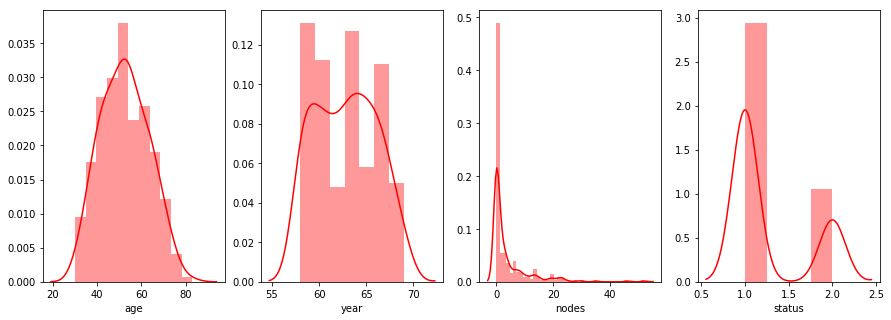

In [9]:
%matplotlib inline
plt.figure(figsize = (15,5))
plt.title('Univariate Analysis: PDF of all features')
for i, col in enumerate(list(data.columns)):
    plt.subplot(1,4,i+1)
    sns.distplot(data[col], color = 'r')
plt.show()

It appears that age has a very Gaussian Distribution, like a bell shaped curve, age has mean about 50 from this observation.
So, the mean age for the people collected from this dataset is about 50 (of patients on whom operation was performed)

The year, is the 1900+x year so for year = 60, the operation year was 1960. Maybe since over the late nineteenth century, science had advanced so the early nineteenth century people had unsucessful operations.

Nodes, the number of nodes of cancer, very few with over 10.

Status, our output is discrete. But maybe we are dealing with skewed classes since we don't have 50% labels for both classes. The number of survived patients is almost thrice that of died.



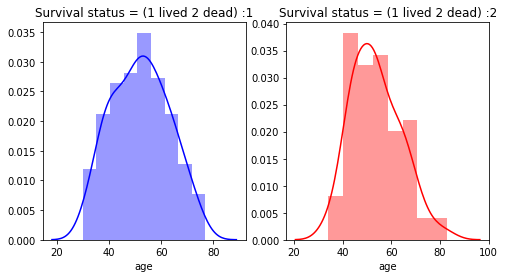

In [10]:
g = data.groupby('status')
c = 0
plt.figure(figsize = (8,4))
for label,df in g:
    plt.subplot(1,2,c+1)
    c+=1
    sns.distplot(df['age'], color = 'r' if label == 2 else 'b')
    plt.title("Survival status = (1 lived 2 dead) :"+str(label))
    

It seems that the mean age of people who died after operation is also around 50, in both PDFs

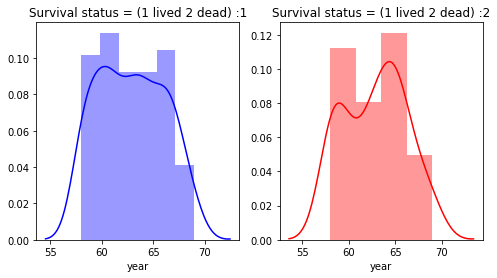

In [11]:
c=0
plt.figure(figsize = (8,4))
for label,df in g:
    plt.subplot(1,2,c+1)
    c+=1
    sns.distplot(df['year'], color = 'r' if label == 2 else 'b')
    plt.title("Survival status = (1 lived 2 dead) :"+str(label))

Maximum patients who died were trated around 1965. 
Maximum patients who lived, were treated around 1960-1967.

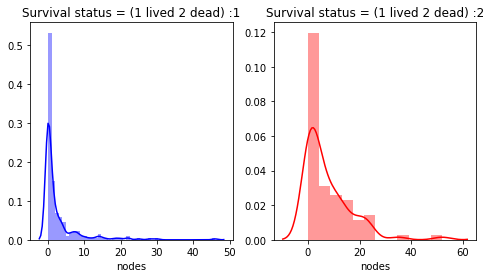

In [12]:
c=0
plt.figure(figsize = (8,4))
for label,df in g:
    plt.subplot(1,2,c+1)
    c+=1
    sns.distplot(df['nodes'], color = 'r' if label == 2 else 'b')
    plt.title("Survival status = (1 lived 2 dead) :"+str(label))

As evident, it seems the more the number of nodes, lesser are the chances of survival. The PDF for dead people is wider, hence has more standard deviation.

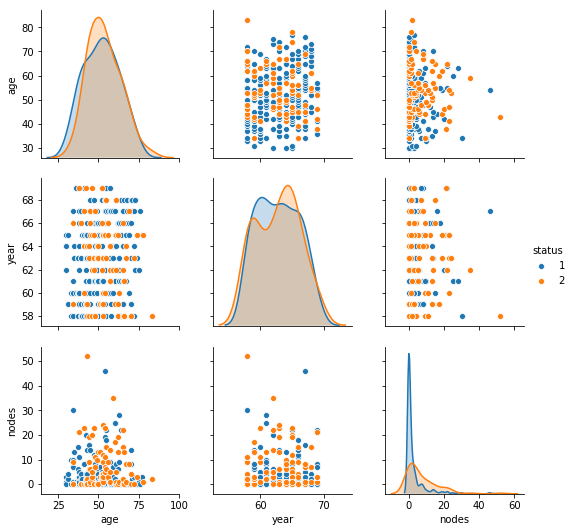

In [15]:
sns.pairplot(data, vars = ['age', 'year', 'nodes'],hue = 'status')
import warnings
warnings.filterwarnings('ignore')

Here, only the nodes PDF seems interesting. 
For the scatter plot, can't find very strong correlation between two features and the survival.
They seem rather mixed.
Looking closely the PDFs (overlapped):

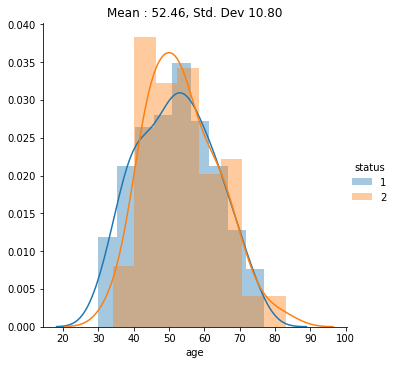

In [16]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Mean : {:.2f}, Std. Dev {:.2f}".format(data['age'].mean(), data['age'].std()))
plt.show()

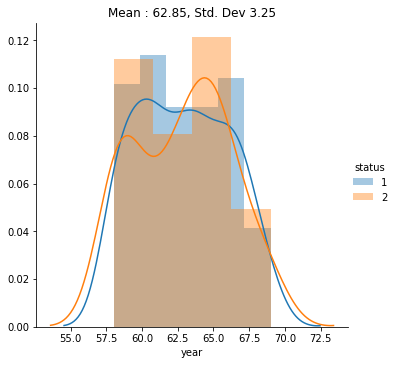

In [17]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Mean : {:.2f}, Std. Dev {:.2f}".format(data['year'].mean(), data['year'].std()))
plt.show();

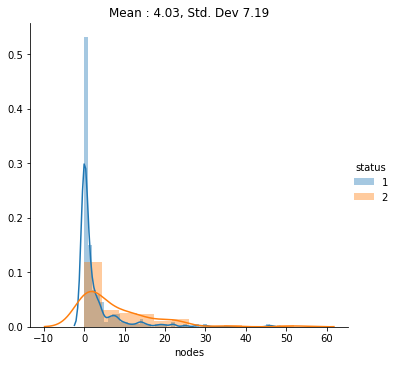

In [18]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Mean : {:.2f}, Std. Dev {:.2f}".format(data['nodes'].mean(), data['nodes'].std()))
plt.show();

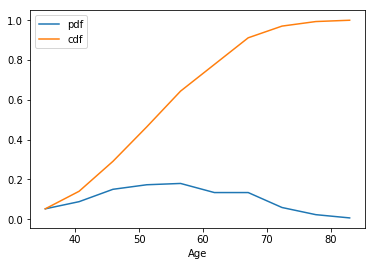

In [19]:
counts, bin_edges = np.histogram(data['age'], bins=10, 
                                 density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf, label = 'pdf')
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.xlabel('Age')
plt.legend()
plt.show()

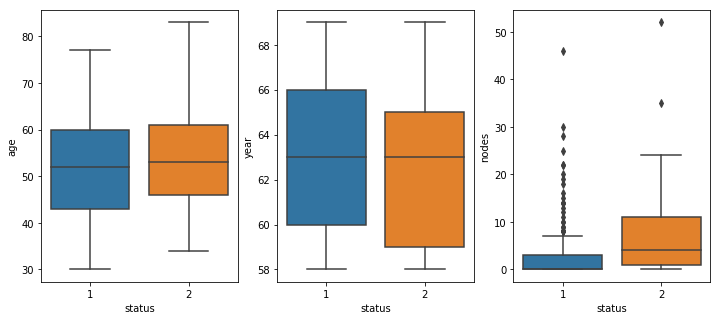

In [20]:
plt.figure(figsize = (12,5))
plt.subplot(131)
sns.boxplot(x = 'status', y = 'age', data = data)
plt.subplot(132)
sns.boxplot(x = 'status', y = 'year', data = data)
plt.subplot(133)
sns.boxplot(x = 'status', y = 'nodes', data = data)
plt.show()

The median age is same more or less, for both cases. However, there is a very slight difference in the 50 percent of points of people with survived status = 2 having more age. 

It also appears that 25 percentage of the people that died had year below 55. And 75 percentile of those died had year 65. Whereas, the median appears to be the same.

There was someone with about 45 nodes that survived.

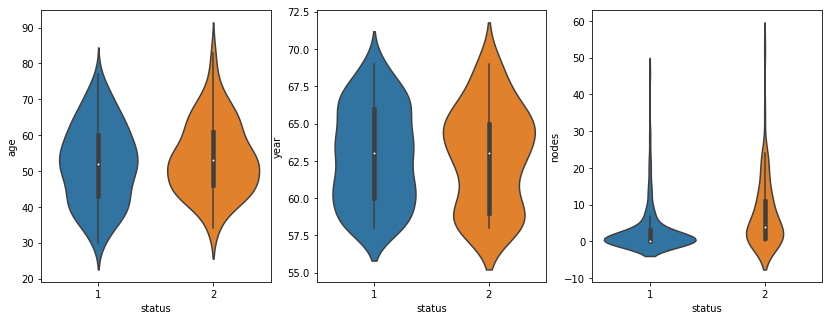

In [21]:
plt.figure(figsize = (14,5))
plt.subplot(131)
sns.violinplot(x="status", y="age", data=data, size=8)
plt.subplot(132)
sns.violinplot(x="status", y="year", data=data, size=8)
plt.subplot(133)
sns.violinplot(x="status", y="nodes", data=data, size=8)
plt.show()

Median of status = 1 for nodes equals to zero.

In [22]:
data.loc[data['status'] == 1,'nodes'].median()

0.0

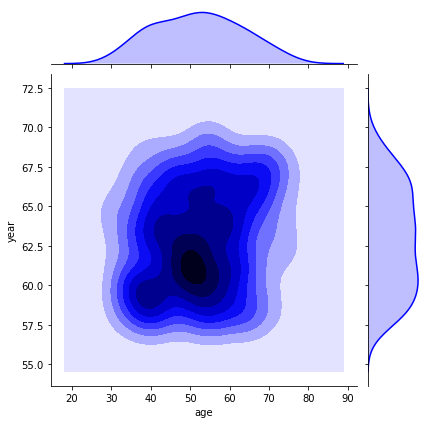

In [23]:
sns.jointplot(x="age", y="year", data=data.loc[data['status'] == 1,:], kind="kde", color= 'blue');
plt.show()

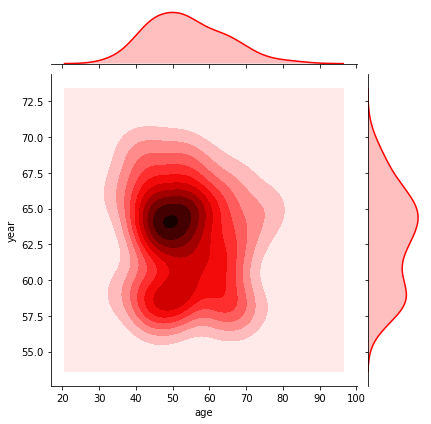

In [24]:
sns.jointplot(x="age", y="year", data=data.loc[data['status'] == 2,:], kind="kde", color= 'red');
plt.show()

Most of who were treated sucessfully had an age of about 50 year and were treated before 1962 or around that.
Most of who died were trated around 1964, had a age slightly less than 50.

**SUMMARY**
Over all, I think it is case that the age and the year the patient were treated had very little to do with the chances of survival, but it is more correlated with number of nodes.